In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from google.colab import drive
import zipfile

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the folder where your dataset is stored
dataset_path = '/content/drive/MyDrive/Dataset/'

# Specify the path to the zip file
zip_path = dataset_path + 'catdog.zip'

# Specify the extraction path
extract_path = dataset_path

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Set the paths to your training and testing datasets
train_data_dir = '/content/drive/MyDrive/Dataset/catsAndDogs40/train'
test_data_dir = '/content/drive/MyDrive/Dataset/catsAndDogs40/test'

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


# Flow training images in batches using train_datagen
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(150, 150), batch_size=8, class_mode='binary')


Found 64 images belonging to 2 classes.


In [29]:
# Flow validation images in batches using test_datagen
validation_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(150, 150), batch_size=8, class_mode='binary')

Found 16 images belonging to 2 classes.


In [19]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Print a summary of the model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [30]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs=10,validation_data=validation_generator, validation_steps=validation_generator.n//validation_generator.batch_size)

Epoch 1/10
8/8 [==============================] - 8s 740ms/step - loss: 0.7891 - accuracy: 0.4844 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 7s 818ms/step - loss: 0.6899 - accuracy: 0.5000 - val_loss: 0.7023 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 6s 741ms/step - loss: 0.6976 - accuracy: 0.5000 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 8s 964ms/step - loss: 0.6923 - accuracy: 0.5000 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 6s 737ms/step - loss: 0.6849 - accuracy: 0.5000 - val_loss: 0.7039 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 0.6785 - accuracy: 0.5156 - val_loss: 0.7103 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 7s 833ms/step - loss: 0.6781 - accuracy: 0.5156 - val_loss: 0.7223 - val_accuracy: 0.5000
Epoch 8/10
8/8 [=======

In [22]:
# Save the trained model
model.save('dog_cat_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(train_generator)
print(f'Test accuracy: {test_acc}')

8/8 [==============================] - 1s 152ms/step - loss: 0.6342 - accuracy: 0.6719
Test accuracy: 0.671875


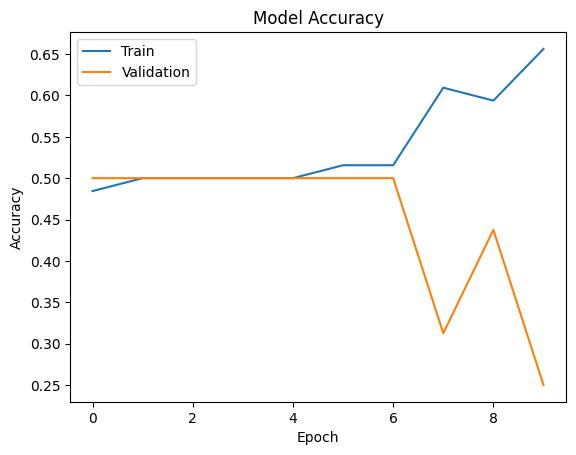

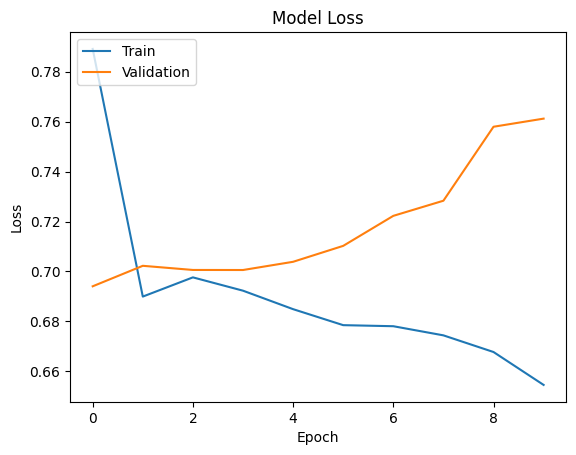

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()